#Install Library & Peckages

In [24]:
!pip install scikit-learn

In [25]:
!pip install wordcloud

In [26]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#read csv
df = pd.read_csv('drive/MyDrive/TA/Codingan TA/analisis sentimen /dataset/stemming_tweet.csv')
df.head()

,clean_tweet),labels
0,Anies urg form true leader peopl border god mr...,positif
1,mr Anies father figur gen lost father figur ab...,positif
2,bubbl,netral
3,ngundhuh wohe pakerti produc commensur,netral
4,support sir expect happen indonesia averag per...,positif


In [29]:
df.isnull().sum()

clean_tweet)    2
labels          0
dtype: int64

In [30]:
df = df.dropna()
df.isnull().sum()

clean_tweet)    0
labels          0
dtype: int64

In [31]:
df.duplicated().sum()

7

In [32]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [33]:
df.shape

(3001, 2)

#Vectorize

In [34]:
import numpy as np
vectorizer = TfidfVectorizer(min_df=5, max_df=0.7, ngram_range=(1, 2))

# Fit dan transform data
tfidf_matrix = vectorizer.fit_transform(df['clean_tweet)'])

# Mendapatkan feature names
feature_names = vectorizer.get_feature_names_out()

# Menampilkan hasil (doc_id, word_id, score)
for doc_id, doc in enumerate(tfidf_matrix):
    for word_id, score in zip(doc.indices, doc.data):
        print(f"({doc_id}, {word_id}) \t {score:.12f}")

Streaming output truncated to the last 5000 lines.
(2357, 876) 	 0.405429385743
(2357, 454) 	 0.417044092284
(2357, 535) 	 0.486823103384
(2358, 287) 	 1.000000000000
(2359, 427) 	 0.535555500103
(2359, 538) 	 0.423914991121
(2359, 772) 	 0.524113628566
(2359, 424) 	 0.262368664731
(2359, 18) 	 0.367161914896
(2359, 771) 	 0.234810781228
(2360, 18) 	 0.800992912950
(2360, 472) 	 0.465457743754
(2360, 132) 	 0.376509551251
(2361, 38) 	 0.395352682036
(2361, 167) 	 0.363428365334
(2361, 987) 	 0.444079871665
(2361, 187) 	 0.402605904940
(2361, 312) 	 0.256812499284
(2361, 489) 	 0.380118239116
(2361, 771) 	 0.206296823262
(2361, 168) 	 0.315145550790
(2362, 825) 	 0.328808345982
(2362, 426) 	 0.327250425215
(2362, 385) 	 0.443988913154
(2362, 1090) 	 0.361302755309
(2362, 899) 	 0.406690598994
(2362, 424) 	 0.217510189471
(2362, 612) 	 0.215475803085
(2362, 722) 	 0.305456610204
(2362, 522) 	 0.238577905322
(2362, 1008) 	 0.218553173481
(2363, 871) 	 0.458026823476
(2363, 534) 	 0.540292

#Pengembangan Model

In [65]:
X = tfidf_matrix
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = MultinomialNB(alpha=0.1)


# Fit the classifier on the training data
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

Hasil Evaluasi Model Analisis Sentimen
Accuracy  :  62.23 %
Recall    :  60.59 %
Precision :  62.23 %
F1-Score  :  58.18 %
Confusion Matrix :  
 [[ 33  12  57]
 [  5  40 114]
 [ 14  25 301]]
Classification Report: 
              precision    recall  f1-score   support

     negatif       0.63      0.32      0.43       102
      netral       0.52      0.25      0.34       159
     positif       0.64      0.89      0.74       340

    accuracy                           0.62       601
   macro avg       0.60      0.49      0.50       601
weighted avg       0.61      0.62      0.58       601



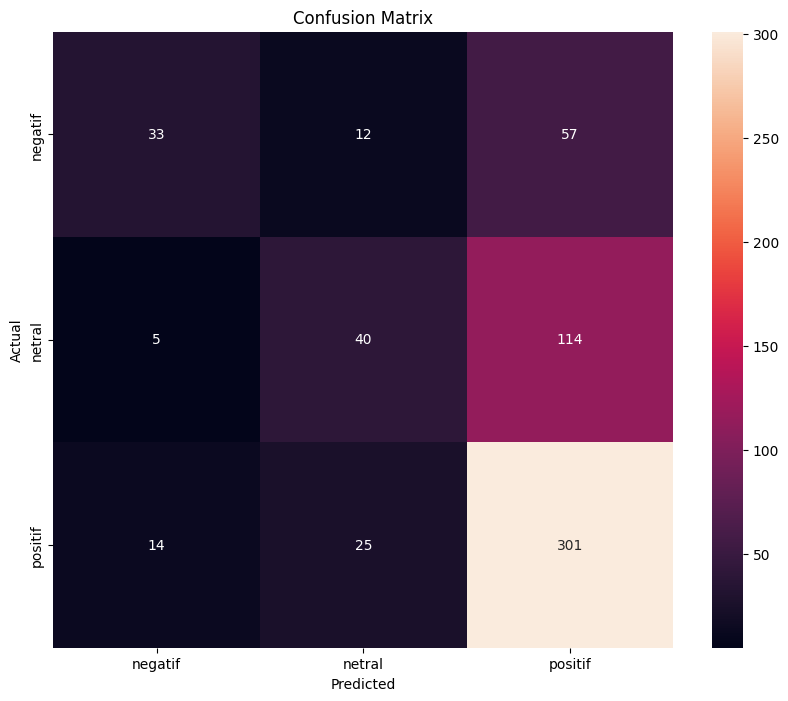

In [67]:
# prediksi dengan test set
y_pred = model.predict(X_test)

# evaluasi model
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print('Hasil Evaluasi Model Analisis Sentimen')
print('Accuracy  : ', round((accuracy)*100,2),'%')
print('Recall    : ', round((precision)*100,2),'%')
print('Precision : ', round((recall)*100,2),'%')
print('F1-Score  : ', round((f1)*100,2),'%')
print('Confusion Matrix :  \n', conf_matrix)

predictions_nb = model.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test,predictions_nb))

# plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'],
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
import joblib
# save model analisis sentimen
joblib.dump(model, 'drive/MyDrive/TA/Codingan TA/analisis sentimen /dataset/model_analisis_sentimen.pkl')

['drive/MyDrive/TA/Codingan TA/analisis sentimen /dataset/model_analisis_sentimen.pkl']

# Implementasi Model ke Dataset per Paslon

In [50]:
def predict_sentiment(dataset_path):
  model = joblib.load('drive/MyDrive/TA/Codingan TA/analisis sentimen /dataset/model_analisis_sentimen.pkl')
  dataset = pd.read_csv(dataset_path)

  tweet_vector = vectorizer.transform(dataset['tweet_english'])
  pred_text = model.predict(tweet_vector)

  predictions_paslon = pd.DataFrame({
    'tweet': dataset['tweet_english'],
    'predicted_label': pred_text
    })
  return predictions_paslon



In [51]:
paslon_01 = 'drive/MyDrive/TA/Codingan TA/anies-muhaimin/new/tweet_english.csv'
paslon_02 = 'drive/MyDrive/TA/Codingan TA/prabowo-gibran/new/tweet_english.csv'
paslon_03 = 'drive/MyDrive/TA/Codingan TA/ganjar-mahfudMd/new/tweet_english.csv'


In [52]:
pred_paslon_01 = predict_sentiment(paslon_01)
pred_paslon_02 = predict_sentiment(paslon_02)
pred_paslon_03 = predict_sentiment(paslon_03)

In [53]:
pred_paslon_01

,tweet,predicted_label
0,Anies urges to form a true leader with the peo...,positif
1,"Mr. Anies is now a father figure for Gen Z, es...",positif
2,bubbles,positif
3,ngundhuh wohing pakerti whatever we do will pr...,positif
4,the support for sir is really beyond expectati...,positif
...,...,...
1038,"guys, sorry, mamak, I didn't do enough researc...",positif
1039,Cakimin Imin's response regarding Prabowo and ...,netral
1040,It's crazy that the debate has become a song w...,positif
1041,"Mr Prabowo wants to, but his deputy Cakimin ca...",positif


In [54]:
pred_paslon_01['predicted_label'].value_counts()

predicted_label
positif    771
netral     205
negatif     67
Name: count, dtype: int64

In [55]:
pred_paslon_02

,tweet,predicted_label
0,"This video clearly shows money politics, shari...",positif
1,listen guys,netral
2,his business stagnated for a year because he c...,positif
3,It turns out that all this time the star fruit...,netral
4,"Next, Mr. Prabowo, don't get emotional, so you...",positif
...,...,...
1041,Gibran was hit by the rain to greet the people...,positif
1042,"visited the king of Maluku, Gibran Rakabuming,...",positif
1043,presidential candidate number Prabowo said not...,positif
1044,Prabowogibran candidate number Prabowogibran's...,positif


In [56]:
pred_paslon_02['predicted_label'].value_counts()

predicted_label
positif    840
netral     118
negatif     88
Name: count, dtype: int64

In [57]:
pred_paslon_03

,tweet,predicted_label
0,The presence of presidential candidate Ganjar ...,positif
1,When visiting the Kebon Agung market in Boyola...,positif
2,Mahfud MD is the solution to improving the law...,positif
3,"with the free vocational school program, presi...",positif
4,Presidential candidate Ganjar Pranowo holds a ...,positif
...,...,...
1038,visit Banten Atikoh Sowan Abuya Muhtadi and vi...,netral
1039,happy drinking,positif
1040,in Garut reward commitment to provide incentiv...,positif
1041,It's time for us to support solving things lik...,positif


In [58]:
pred_paslon_03['predicted_label'].value_counts()

predicted_label
positif    860
netral     123
negatif     60
Name: count, dtype: int64